In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/solar-mini/solar_savings_dataset_updated.csv")


In [ ]:
!pip install matplotlib seaborn --quiet
import matplotlib.pyplot as plt
%matplotlib inline



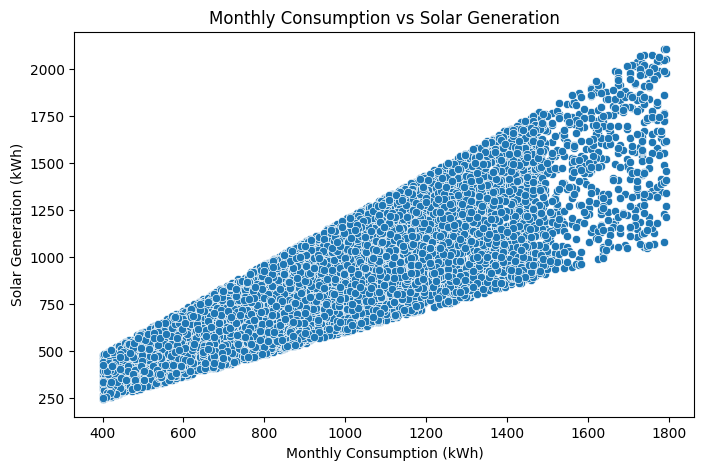

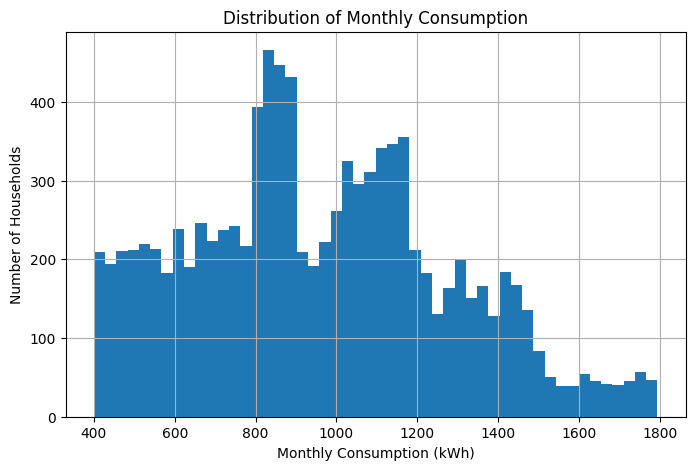

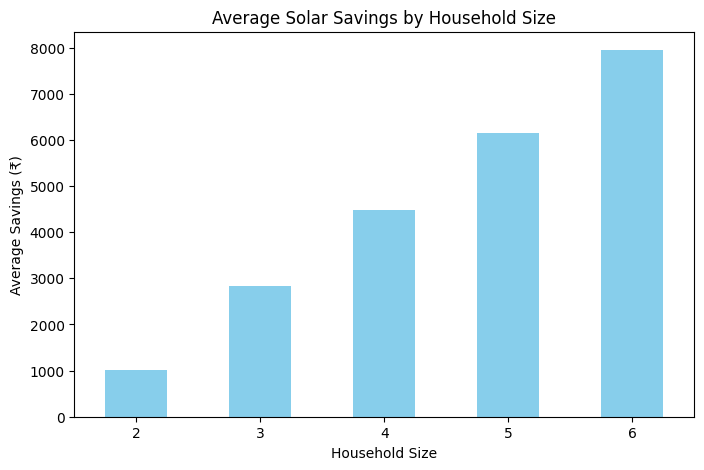

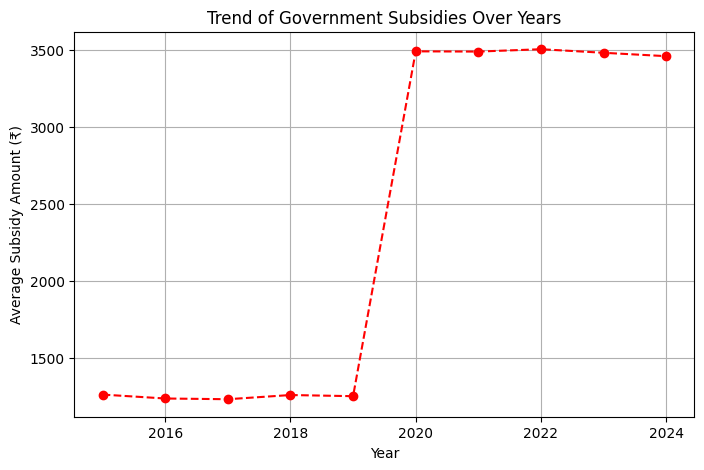

                            Model      MAE         MSE     RMSE  R² Score
0               Linear Regression     0.00        0.00     0.00    1.0000
1         Random Forest Regressor    62.16     9172.49    95.77    0.9986
2  Support Vector Regressor (SVR)  1813.06  5140887.69  2267.35    0.2396
3         Decision Tree Regressor   130.42    33060.92   181.83    0.9951


In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

try:
    import matplotlib.pyplot as plt
    %matplotlib inline
except ModuleNotFoundError:
    print("Warning: matplotlib not available. Visualizations will not be generated.")

df = pd.read_csv("/content/drive/My Drive/solar-mini/solar_savings_dataset_updated.csv")


features = [
    "Household_Size", "House_Area_sqft", "Monthly_Consumption_kWh", "Solar_Generation_kWh",
    "Energy_Sent_to_Grid_kWh", "Subsidy_Amount", "Avg_Sunlight_Hours_per_Day",
    "Avg_Temperature_Celsius", "Cloud_Coverage_%", "Electricity_Rate_per_kWh",
    "Net_Metering_Credit_per_kWh", "Govt_Solar_Subsidy_%", "Solar_Setup_Cost"
]
target = "Final_Bill_After_Savings"

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Monthly_Consumption_kWh"], y=df["Solar_Generation_kWh"])
plt.xlabel("Monthly Consumption (kWh)")
plt.ylabel("Solar Generation (kWh)")
plt.title("Monthly Consumption vs Solar Generation")
plt.show()


plt.figure(figsize=(8, 5))
df["Monthly_Consumption_kWh"].hist(bins=50)
plt.xlabel("Monthly Consumption (kWh)")
plt.ylabel("Number of Households")
plt.title("Distribution of Monthly Consumption")
plt.show()


plt.figure(figsize=(8, 5))
df.groupby("Household_Size")["Final_Bill_After_Savings"].mean().plot(kind="bar", color="skyblue")
plt.xlabel("Household Size")
plt.ylabel("Average Savings (₹)")
plt.title("Average Solar Savings by Household Size")
plt.xticks(rotation=0)
plt.show()


plt.figure(figsize=(8, 5))
df.groupby("Year")["Subsidy_Amount"].mean().plot(kind="line", marker="o", linestyle="--", color="red")
plt.xlabel("Year")
plt.ylabel("Average Subsidy Amount (₹)")
plt.title("Trend of Government Subsidies Over Years")
plt.grid()
plt.show()

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor (SVR)": SVR(kernel="rbf"),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42)
}


model_results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    model_results.append([model_name, round(mae, 2), round(mse, 2), round(rmse, 2), round(r2, 4)])


df_results = pd.DataFrame(model_results, columns=["Model", "MAE", "MSE", "RMSE", "R² Score"])
print(df_results)


param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}


grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)

y_pred_optimized = grid_search.best_estimator_.predict(X_test)
mae_opt = mean_absolute_error(y_test, y_pred_optimized)
mse_opt = mean_squared_error(y_test, y_pred_optimized)
rmse_opt = np.sqrt(mse_opt)
r2_opt = r2_score(y_test, y_pred_optimized)

print("Optimized Model Performance:")
print(f"MAE: {mae_opt:.2f}, MSE: {mse_opt:.2f}, RMSE: {rmse_opt:.2f}, R²: {r2_opt:.4f}")

joblib.dump(grid_search.best_estimator_, "solar_savings_rf_model.pkl")



In [ ]:
from google.colab import files

files.download("/content/drive/My Drive/Colab Notebooks/Copy of Untitled1.ipynb")